In [ ]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/All Lending Club/Loan_status_2007-2020Q3.gzip')
df.info()


<ipython-input-2-451a4d7dd212>:2: DtypeWarning: Columns (1,48,58,117,127,128,129,132,133,134,137) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/All Lending Club/Loan_status_2007-2020Q3.gzip')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925493 entries, 0 to 2925492
Columns: 142 entries, Unnamed: 0 to debt_settlement_flag
dtypes: float64(106), int64(1), object(35)
memory usage: 3.1+ GB


In [ ]:
df.info()

In [ ]:
df['loan_status'].value_counts(dropna=False)

In [ ]:
# All Categorical Features

categorical_feature = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(categorical_feature)

**Remove features with more than 50% missing values**

In [ ]:
# Calculate missing value percentages
missing_percentages = df.isnull().mean() * 100

for column, missing_percentage in missing_percentages.items():
    print(f"{column} --> {df[column].isnull().sum()} missing values ({missing_percentage:.2f}%)")

# Identify columns with more than 50% missing values
columns_to_drop = missing_percentages[missing_percentages > 50].index.tolist()

# Remove columns with more than 50% missing values
df = df.drop(columns=columns_to_drop)

# Display the filtered DataFrame
print("\n\nDataFrame after removing columns with more than 50% missing values:")
print(df.head())

Unnamed: 0 --> 0 missing values (0.00%)
id --> 0 missing values (0.00%)
loan_amnt --> 1 missing values (0.00%)
funded_amnt --> 1 missing values (0.00%)
funded_amnt_inv --> 1 missing values (0.00%)
term --> 1 missing values (0.00%)
int_rate --> 1 missing values (0.00%)
installment --> 1 missing values (0.00%)
grade --> 1 missing values (0.00%)
sub_grade --> 1 missing values (0.00%)
emp_title --> 264087 missing values (9.03%)
emp_length --> 205221 missing values (7.01%)
home_ownership --> 1 missing values (0.00%)
annual_inc --> 5 missing values (0.00%)
verification_status --> 1 missing values (0.00%)
issue_d --> 1 missing values (0.00%)
loan_status --> 1 missing values (0.00%)
pymnt_plan --> 1 missing values (0.00%)
url --> 1 missing values (0.00%)
purpose --> 1 missing values (0.00%)
title --> 23327 missing values (0.80%)
zip_code --> 2 missing values (0.00%)
addr_state --> 1 missing values (0.00%)
dti --> 3109 missing values (0.11%)
delinq_2yrs --> 30 missing values (0.00%)
earliest_cr

In [ ]:
df.head()

In [ ]:
pip install skfeature-chappers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 737.1 kB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
from skfeature.function.similarity_based import fisher_score
import numpy as np
import pandas as pd

X = df.drop(columns=['loan_status'])
y = df['loan_status']

Preprocessing

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

X.drop('id', axis=1, inplace=True)
X.drop('Unnamed: 0', axis=1, inplace=True)
X.drop('url', axis=1, inplace=True)
X.drop('zip_code', axis=1, inplace=True)
X.drop('addr_state', axis=1, inplace=True)
X.drop('emp_title', axis=1, inplace=True)
X.drop('title', axis=1, inplace=True)

X['term'].fillna('', inplace=True)


def extract_numeric(term):
    if isinstance(term, str):
        term = term.strip()
        if term.endswith(' months'):
            term = term[:-len(' months')]
        numeric_part = ''.join(filter(str.isdigit, term))
        if numeric_part:
            return int(numeric_part)
    return None


X['term'] = X['term'].apply(extract_numeric)

def remove_percentage(value):
    if isinstance(value, str) and value.endswith('%'):
        return float(value[:-1])
    else:
        return None


X['revol_util'] = X['revol_util'].apply(remove_percentage)
X['int_rate'] = X['int_rate'].apply(remove_percentage)



date_format = '%b-%Y'  # Example format: Month ( Jan) - Year ( 2015)

# Convert date features to datetime format
X['last_credit_pull_d'] = pd.to_datetime(X['last_credit_pull_d'], format=date_format)
X['last_pymnt_d'] = pd.to_datetime(X['last_pymnt_d'], format=date_format)
X['issue_d'] = pd.to_datetime(X['issue_d'], format=date_format)
X['earliest_cr_line'] = pd.to_datetime(X['earliest_cr_line'], format=date_format)


emp_length_mapping = {
    '10+ years': 10,
    '9 years': 9,
    '8 years': 8,
    '7 years': 7,
    '6 years': 6,
    '5 years': 5,
    '4 years': 4,
    '3 years': 3,
    '2 years': 2,
    '1 year': 1,
    '< 1 year': 0.5,
    ' ': 0
}

# Apply the mapping to convert emp_length to numerical values
X['emp_length'] = X['emp_length'].map(emp_length_mapping)



ordinal_features = ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'pymnt_plan', 'purpose', 'application_type', 'hardship_flag','debt_settlement_flag']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to ordinal categorical features
for feature in ordinal_features:
    X[feature] = label_encoder.fit_transform(X[feature])




# Function to convert non-datetime features to integer
def convert_to_integer(value):
    try:
        return int(value)  # Try converting to integer directly
    except (ValueError, TypeError):
        return None  # Return None for non-convertible values

# Identify datetime columns (timestamp columns)
datetime_columns = [col for col in X.columns if pd.api.types.is_datetime64_any_dtype(X[col])]

# Apply conversion function to non-datetime columns
for column in X.columns:
    if column not in datetime_columns:
        X[column] = X[column].apply(convert_to_integer)

# Use LabelEncoder for categorical features (e.g., feature2)
label_encoder = LabelEncoder()
for column in X.columns:
    if column not in datetime_columns and X[column].dtype == 'object':
        X[column] = label_encoder.fit_transform(X[column])




datetime_columns = ['last_credit_pull_d', 'last_pymnt_d', 'issue_d', 'earliest_cr_line']

reference_date = pd.Timestamp('2024-04-22')

for col in datetime_columns:
    X[col] = (reference_date - X[col]).dt.days
X.fillna(X.mean(), inplace=True)

Normalization & label Encoder

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled data back to a DataFrame
X = pd.DataFrame(X_scaled, columns=X.columns)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# **Kendall's Tau coefficient**

In [ ]:
from scipy.stats import kendalltau
from sklearn.model_selection import GridSearchCV, KFold, train_test_split

kendall_tau_scores = {}
for col in X.columns:
    tau, _ = kendalltau(X[col], y)
    kendall_tau_scores[col] = abs(tau)

# Define the number of top features to select
k = 50

# Rank features based on Kendall's tau coefficient
ranked_features = sorted(kendall_tau_scores.items(), key=lambda x: x[1], reverse=True)

# Select top-ranked features
top_features = [feature[0] for feature in ranked_features[:k]]

In [ ]:
# Print the top features
print("Top", k, "Features based on Kendall's Tau Coefficient:")
for i, (feature, tau_score) in enumerate(ranked_features[:k], 1):
    print(f"{i}. {feature}: {tau_score}")

Top 50 Features based on Kendall's Tau Coefficient:
1. initial_list_status: nan
2. recoveries: 0.4901926083649289
3. collection_recovery_fee: 0.4842132750006111
4. out_prncp: 0.4339854404920486
5. out_prncp_inv: 0.43398533440028597
6. total_rec_prncp: 0.42349150389269247
7. last_pymnt_amnt: 0.37523035118893383
8. last_pymnt_d: 0.33684816767160375
9. total_pymnt: 0.3137141825384905
10. total_pymnt_inv: 0.313100003578842
11. issue_d: 0.299706840925894
12. last_fico_range_low: 0.21757189284219355
13. last_fico_range_high: 0.21756942955126754
14. debt_settlement_flag: 0.21188441252848536
15. last_credit_pull_d: 0.19480626907034646
16. term: 0.1619436553590523
17. hardship_flag: 0.11893889502769575
18. int_rate: 0.10550207247703641
19. earliest_cr_line: 0.09968014358208249
20. total_rec_late_fee: 0.09853928131551308
21. inq_last_12m: 0.08592057275695761
22. total_cu_tl: 0.08521533395736974
23. funded_amnt_inv: 0.07701930168699718
24. inq_fi: 0.07676311891605742
25. funded_amnt: 0.0765739770

In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 4.8 MB/s eta 0:00:00


In [ ]:
pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 2.9 MB/s eta 0:00:00


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix

# Step 3: Split the data
X_train, X_test, y_train, y_test = train_test_split(X[top_features], y, test_size=0.3, random_state=42)

# Step 4: Initialize models
dt_model = DecisionTreeClassifier()
lr_model = LogisticRegression()
rf_model = RandomForestClassifier()
#xgb_model = XGBClassifier()
catboost_model = CatBoostClassifier()
svm_model = SVC()

## **Normal Models**

XGBoost

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, confusion_matrix

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb)


# Results for XGBoost
print("Model: XGBoost")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"Classification Report:\n{report_xgb}\n")


y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Calculate accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy:", accuracy_xgb)

sorted_indices = np.argsort(y_prob_xgb)[::-1]
y_test_sorted = y_test[sorted_indices]
y_prob_sorted = y_prob_xgb[sorted_indices]

# Calculate cumulative proportion of positive examples (Cumulative Gain)
cumulative_positives = np.cumsum(y_test_sorted)

# Calculate cumulative proportion of all examples (Cumulative Lift)
cumulative_total = np.arange(1, len(y_test_sorted) + 1)

# Calculate Gini index based on Lorenz curve (normalized)
gini_index = 1 - (2 * np.sum(cumulative_positives) / np.sum(y_test_sorted)) / len(y_test_sorted)

print("Estimated Gini Index:", gini_index)

# Calculate Gini index (2 * AUC - 1)
#gini_index_xgb = 2 * auc_score_xgb - 1
#print("Gini Index:", gini_index_xgb)

# Calculate precision, recall (sensitivity), and specificity
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')

# Calculate H-Measure
h_measure_xgb = 2 * precision_xgb * recall_xgb / (precision_xgb + recall_xgb)
print("H-Measure:", h_measure_xgb)

# Calculate confusion matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Calculate sensitivity (true positive rate)
sensitivity_xgb = recall_xgb
print("Sensitivity (TPR):", sensitivity_xgb)

# Calculate specificity (True Negative Rate)
tn = conf_matrix_xgb[0, 0]
fp = np.sum(conf_matrix_xgb[0, 1:])
specificity_xgb = tn / (tn + fp)
print("Specificity (TNR):", specificity_xgb)


# Calculate G-mean (Geometric mean of sensitivity and specificity)
g_mean_xgb = np.sqrt(sensitivity_xgb * specificity_xgb)
print("G-mean:", g_mean_xgb)

Model: XGBoost
Accuracy: 0.9905
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    108910
           1       0.99      0.99      0.99    309744
           2       0.87      0.32      0.47       126
           3       0.68      0.42      0.52       212
           4       0.78      0.36      0.50       595
           5       0.99      1.00      1.00    448809
           6       0.56      0.32      0.41      2978
           7       0.94      0.97      0.96       599
           8       0.37      0.03      0.05       806
           9       0.90      0.80      0.85      4869

    accuracy                           0.99    877648
   macro avg       0.81      0.62      0.67    877648
weighted avg       0.99      0.99      0.99    877648


Accuracy: 0.9904802380908975
Estimated Gini Index: 0.13045441113104883
H-Measure: 0.9898168528143311
Sensitivity (TPR): 0.9904802380908975
Specificity (TNR): 0.9975208888072721
G-mean: 

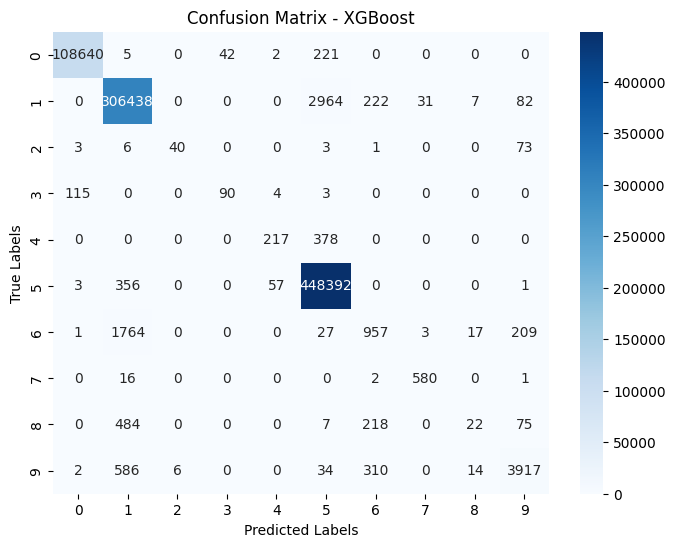

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_xgb)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
# Install SHAP library
!pip install shap

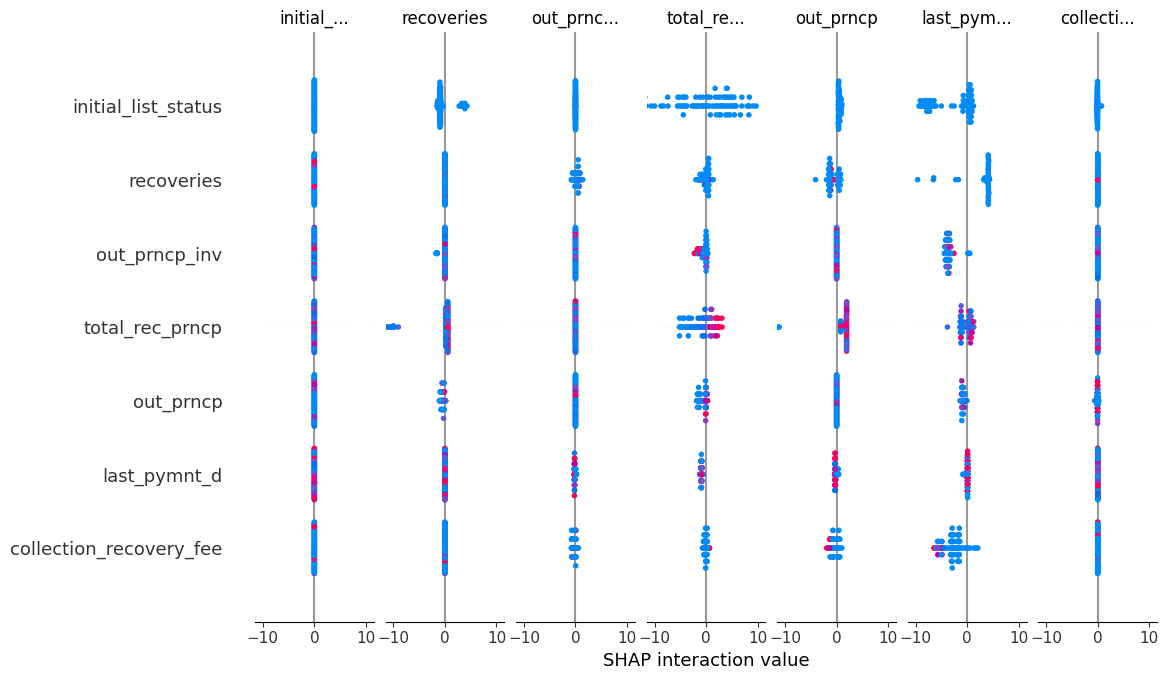

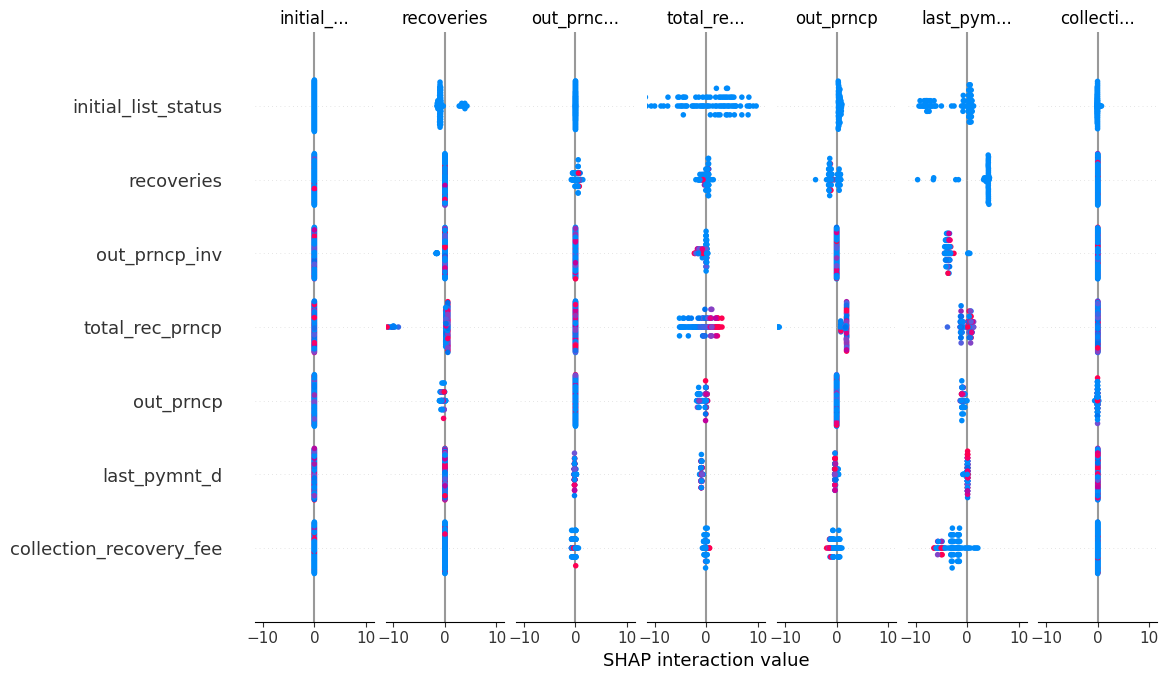

In [ ]:
import shap

explainer_xgb = shap.Explainer(xgb_model)
shap_values_xgb = explainer_xgb.shap_values(X_test.iloc[:100])

# Summary plot for XGBoost
shap.summary_plot(shap_values_xgb, X_test.iloc[:100])
shap.summary_plot(shap_values_xgb, X_test.iloc[:100], plot_type="bar", color_bar=True, class_names=["Class 0", "Class 1"])

In [ ]:
from interpret import show
from interpret.blackbox import MorrisSensitivity
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from interpret import show
from interpret.blackbox import MorrisSensitivity

# Determine the class with the highest frequency
unique_classes, class_counts = np.unique(y, return_counts=True)
highest_class = unique_classes[np.argmax(class_counts)]

# Create a binary target variable where the highest class is mapped to 1 and all other classes are mapped to 0
y = np.where(y == highest_class, 1, 0)


# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model on the binary classification data
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Apply Morris Sensitivity explanation on the binary classification problem
msa = MorrisSensitivity(xgb_model, X_test)

# Show the global explanation
show(msa.explain_global())

/usr/local/lib/python3.10/dist-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)
/usr/local/lib/python3.10/dist-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)


Feature Importance (Permutation):
Feature: total_bal_il, Importance: -0.0000
Feature: mo_sin_old_rev_tl_op, Importance: -0.0000
Feature: num_tl_90g_dpd_24m, Importance: -0.0000
Feature: num_tl_120dpd_2m, Importance: -0.0000
Feature: mort_acc, Importance: -0.0000
Feature: last_fico_range_high, Importance: -0.0000
Feature: num_bc_tl, Importance: -0.0000
Feature: open_il_24m, Importance: -0.0000
Feature: collection_recovery_fee, Importance: -0.0000
Feature: home_ownership, Importance: -0.0000
Feature: int_rate, Importance: -0.0000
Feature: initial_list_status, Importance: 0.0000
Feature: inq_fi, Importance: 0.0000
Feature: open_rv_24m, Importance: 0.0000
Feature: avg_cur_bal, Importance: 0.0000
Feature: num_actv_rev_tl, Importance: 0.0000
Feature: tax_liens, Importance: 0.0000
Feature: inq_last_12m, Importance: 0.0000
Feature: num_tl_30dpd, Importance: 0.0000
Feature: total_cu_tl, Importance: 0.0000
Feature: verification_status, Importance: 0.0000
Feature: mths_since_rcnt_il, Importance: 

<ipython-input-13-f3964cc4e896>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Feature', y='Importance', data=feature_importance, palette='husl')


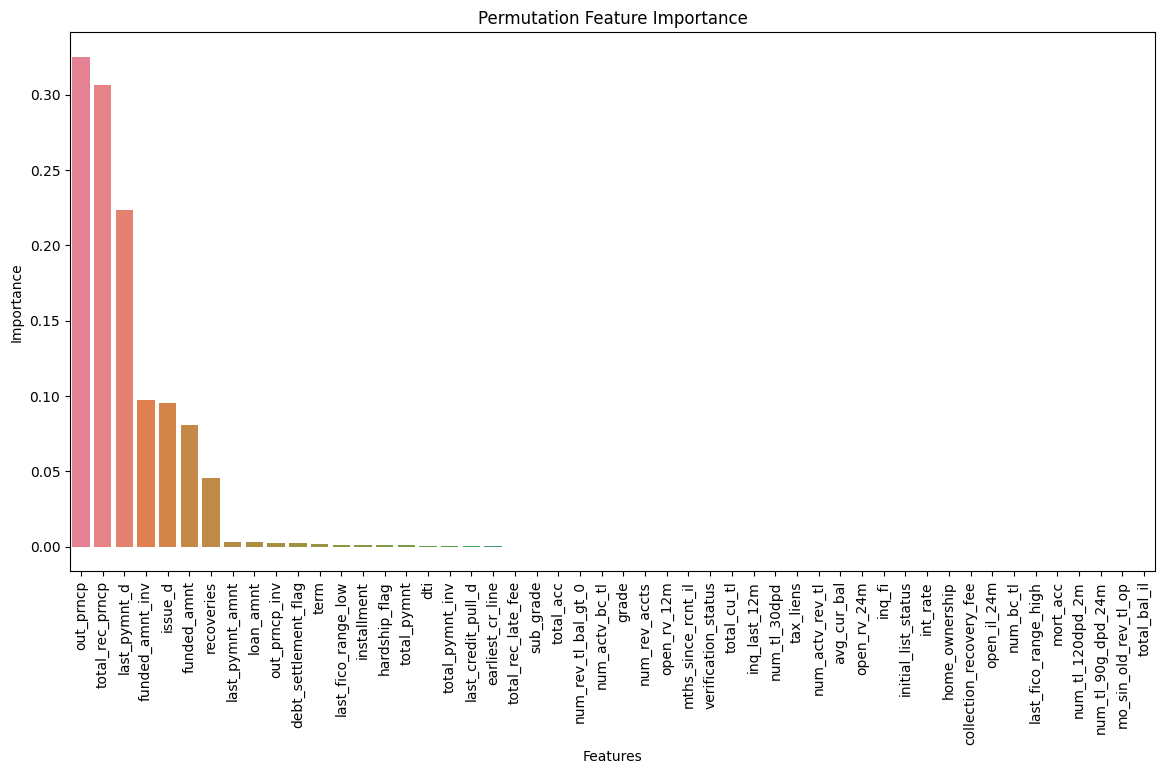

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.inspection import permutation_importance
import seaborn as sns


xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Calculate permutation feature importance
result = permutation_importance(xgb_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Get feature importance and sort them
sorted_idx = result.importances_mean.argsort()
feature_importance = pd.DataFrame({
    'Feature': X_test.columns[sorted_idx],
    'Importance': result.importances_mean[sorted_idx]
})

# Print all features with their importance
print("Feature Importance (Permutation):")
for index, row in feature_importance.iterrows():
    print(f"Feature: {row['Feature']}, Importance: {row['Importance']:.4f}")

# Sort the features based on their importance values
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(14, 7))
sns.barplot(x='Feature', y='Importance', data=feature_importance, palette='husl')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Permutation Feature Importance')
plt.xticks(rotation=90)
plt.show()

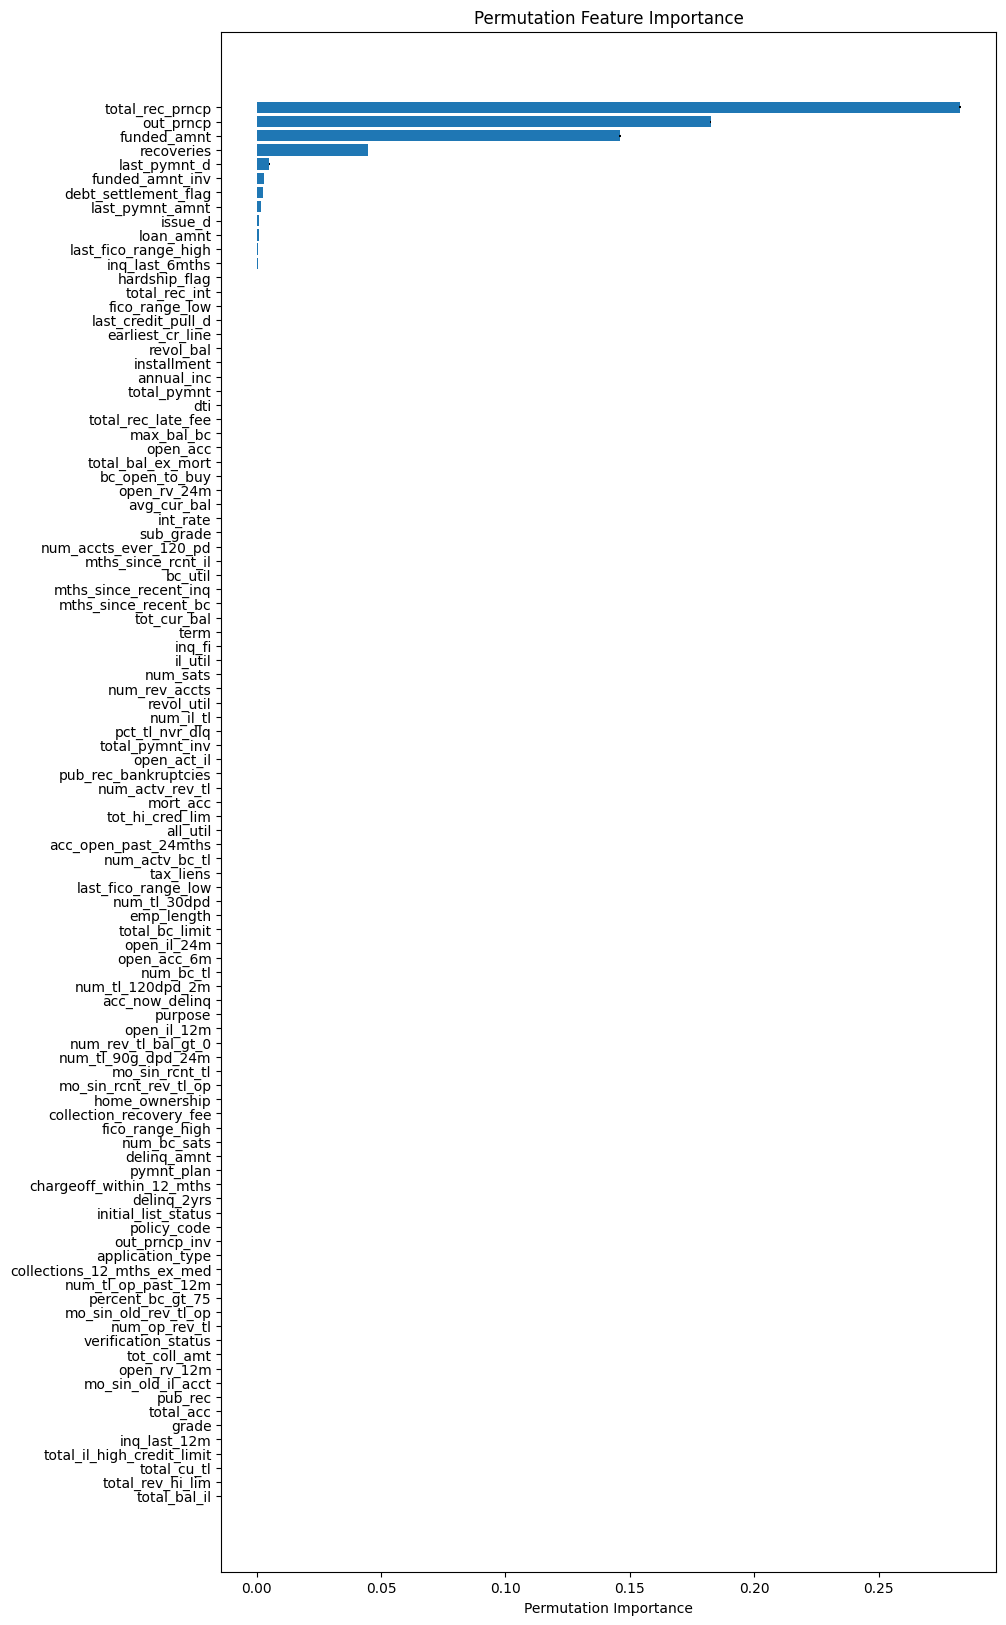

In [ ]:
import matplotlib.pyplot as plt

# Get sorted indices of feature importance
sorted_idx = result.importances_mean.argsort()

# Plot permutation feature importance
plt.figure(figsize=(10, 20))
plt.barh(range(len(sorted_idx)), result.importances_mean[sorted_idx], xerr=result.importances_std[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [X_test.columns[i] for i in sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Permutation Feature Importance')
plt.show()


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

rf_model = RandomForestClassifier(n_estimators=40, random_state=42)
rf_model.fit(X_train, y_train)

# Calculate accuracy score
accuracy = accuracy_score(y_test, rf_model.predict(X_test))
print("Accuracy:", accuracy)
report_xgb = classification_report(y_test, y_pred_xgb)



In [ ]:
y_prob_rf = xgb_model.predict_proba(X_test)[:, 1]
y_pred_rf = rf_model.predict(X_test)

# Calculate accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy_xgb)

sorted_indices = np.argsort(y_prob_rf)[::-1]
y_test_sorted = y_test[sorted_indices]
y_prob_sorted = y_prob_rf[sorted_indices]

# Calculate cumulative proportion of positive examples (Cumulative Gain)
cumulative_positives = np.cumsum(y_test_sorted)

# Calculate cumulative proportion of all examples (Cumulative Lift)
cumulative_total = np.arange(1, len(y_test_sorted) + 1)

# Calculate Gini index based on Lorenz curve (normalized)
gini_index = 1 - (2 * np.sum(cumulative_positives) / np.sum(y_test_sorted)) / len(y_test_sorted)

print("Estimated Gini Index:", gini_index)

# Calculate precision, recall (sensitivity), and specificity
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')

# Calculate H-Measure
h_measure_rf = 2 * precision_rf * recall_rf / (precision_rf + recall_rf)
print("H-Measure:", h_measure_rf)

# Calculate confusion matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_rf)

# Calculate sensitivity (true positive rate)
sensitivity_rf = recall_rf
print("Sensitivity (TPR):", sensitivity_rf)

# Calculate specificity (True Negative Rate)
tn = conf_matrix_xgb[0, 0]
fp = np.sum(conf_matrix_xgb[0, 1:])
specificity_rf = tn / (tn + fp)
print("Specificity (TNR):", specificity_rf)


# Calculate G-mean (Geometric mean of sensitivity and specificity)
g_mean_rf = np.sqrt(sensitivity_rf * specificity_rf)
print("G-mean:", g_mean_rf)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

# 1. Train Logistic Regression Model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# 2. Generate Predictions
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]  # Predicted probabilities for positive class
y_pred_lr = lr_model.predict(X_test)  # Predicted labels

# 3. Calculate Metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

# Calculate sensitivity (True Positive Rate)
tp_lr = conf_matrix_lr[1, 1]  # True positives
fn_lr = conf_matrix_lr[1, 0]  # False negatives
sensitivity_lr = tp_lr / (tp_lr + fn_lr)

# Calculate specificity (True Negative Rate)
tn_lr = conf_matrix_lr[0, 0]  # True negatives
fp_lr = conf_matrix_lr[0, 1]  # False positives
specificity_lr = tn_lr / (tn_lr + fp_lr)

# Calculate G-mean (Geometric Mean of Sensitivity and Specificity)
g_mean_lr = (sensitivity_lr * specificity_lr) ** 0.5

# Calculate H-measure (Harmonic Mean of Precision and Recall)
precision_lr = tp_lr / (tp_lr + fp_lr)
recall_lr = tp_lr / (tp_lr + fn_lr)
h_measure_lr = 2 * precision_lr * recall_lr / (precision_lr + recall_lr)


# 4. Print Metrics
print("Logistic Regression Metrics:")
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Sensitivity (TPR): {sensitivity_lr:.4f}")
print(f"Specificity (TNR): {specificity_lr:.4f}")
print(f"G-mean: {g_mean_lr:.4f}")
print(f"H-measure: {h_measure_lr:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

In [ ]:
sorted_indices = np.argsort(y_pred_lr)[::-1]
y_test_sorted3 = y_test[sorted_indices]
y_prob_sorted3 = y_pred_lr[sorted_indices]

# Calculate cumulative proportion of positive examples (Cumulative Gain)
cumulative_positives = np.cumsum(y_test_sorted3)

# Calculate cumulative proportion of all examples (Cumulative Lift)
cumulative_total = np.arange(1, len(y_test_sorted3) + 1)

# Calculate Gini index based on Lorenz curve (normalized)
gini_index = 1 - (2 * np.sum(cumulative_positives) / np.sum(y_test_sorted3)) / len(y_test_sorted3)

print("Estimated Gini Index:", gini_index)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Train Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# 2. Generate Predictions
y_pred_dt = dt_model.predict(X_test)  # Predicted labels

# 3. Calculate Metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Calculate sensitivity (True Positive Rate)
tp_dt = conf_matrix_dt[1, 1]  # True positives
fn_dt = conf_matrix_dt[1, 0]  # False negatives
sensitivity_dt = tp_dt / (tp_dt + fn_dt)

# Calculate specificity (True Negative Rate)
tn_dt = conf_matrix_dt[0, 0]  # True negatives
fp_dt = conf_matrix_dt[0, 1]  # False positives
specificity_dt = tn_dt / (tn_dt + fp_dt)

# Calculate G-mean (Geometric Mean of Sensitivity and Specificity)
g_mean_dt = (sensitivity_dt * specificity_dt) ** 0.5

# Calculate H-measure (Harmonic Mean of Precision and Recall)
precision_dt = tp_dt / (tp_dt + fp_dt)
recall_dt = tp_dt / (tp_dt + fn_dt)
h_measure_dt = 2 * precision_dt * recall_dt / (precision_dt + recall_dt)

# 4. Print Metrics
print("Decision Tree Metrics:")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Sensitivity (TPR): {sensitivity_dt:.4f}")
print(f"Specificity (TNR): {specificity_dt:.4f}")
print(f"G-mean: {g_mean_dt:.4f}")
print(f"H-measure: {h_measure_dt:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

CatBoost

In [ ]:
catboost_model = CatBoostClassifier()
catboost_model.fit(X_train, y_train)

# 2. Generate Predictions
y_pred_dt = catboost_model.predict(X_test)  # Predicted labels

# 3. Calculate Metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Calculate sensitivity (True Positive Rate)
tp_dt = conf_matrix_dt[1, 1]  # True positives
fn_dt = conf_matrix_dt[1, 0]  # False negatives
sensitivity_dt = tp_dt / (tp_dt + fn_dt)

# Calculate specificity (True Negative Rate)
tn_dt = conf_matrix_dt[0, 0]  # True negatives
fp_dt = conf_matrix_dt[0, 1]  # False positives
specificity_dt = tn_dt / (tn_dt + fp_dt)

# Calculate G-mean (Geometric Mean of Sensitivity and Specificity)
g_mean_dt = (sensitivity_dt * specificity_dt) ** 0.5

# Calculate H-measure (Harmonic Mean of Precision and Recall)
precision_dt = tp_dt / (tp_dt + fp_dt)
recall_dt = tp_dt / (tp_dt + fn_dt)
h_measure_dt = 2 * precision_dt * recall_dt / (precision_dt + recall_dt)

# 4. Print Metrics
print("Decision Tree Metrics:")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Sensitivity (TPR): {sensitivity_dt:.4f}")
print(f"Specificity (TNR): {specificity_dt:.4f}")
print(f"G-mean: {g_mean_dt:.4f}")
print(f"H-measure: {h_measure_dt:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - CatBoost')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

SVM

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

svm_model = SVC()
svm_model.fit(X_train, y_train)

# 2. Generate Predictions
y_pred_dt = svm_model.predict(X_test)  # Predicted labels

# 3. Calculate Metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Calculate sensitivity (True Positive Rate)
tp_dt = conf_matrix_dt[1, 1]  # True positives
fn_dt = conf_matrix_dt[1, 0]  # False negatives
sensitivity_dt = tp_dt / (tp_dt + fn_dt)

# Calculate specificity (True Negative Rate)
tn_dt = conf_matrix_dt[0, 0]  # True negatives
fp_dt = conf_matrix_dt[0, 1]  # False positives
specificity_dt = tn_dt / (tn_dt + fp_dt)

# Calculate G-mean (Geometric Mean of Sensitivity and Specificity)
g_mean_dt = (sensitivity_dt * specificity_dt) ** 0.5

# Calculate H-measure (Harmonic Mean of Precision and Recall)
precision_dt = tp_dt / (tp_dt + fp_dt)
recall_dt = tp_dt / (tp_dt + fn_dt)
h_measure_dt = 2 * precision_dt * recall_dt / (precision_dt + recall_dt)

# 4. Print Metrics
print("SVM Metrics:")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Sensitivity (TPR): {sensitivity_dt:.4f}")
print(f"Specificity (TNR): {specificity_dt:.4f}")
print(f"G-mean: {g_mean_dt:.4f}")
print(f"H-measure: {h_measure_dt:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# **Gridsearch CV and 5-fold cross validation**

Logistic Regression: 5 fold-CV

In [ ]:
# GPT GIVEN NEW CODE of LR

import numpy as np
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Logistic Regression model
lr_model = LogisticRegression()

# Define parameter grid for GridSearchCV
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2']  # Penalty term
}

# Create StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Create GridSearchCV
grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid, cv=cv, scoring='accuracy', verbose=1)

# Fit the GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Get the best model from GridSearchCV
best_lr_model = grid_search.best_estimator_

# Generate predictions
y_pred_lr = best_lr_model.predict(X_test)

# Calculate evaluation metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

# Print evaluation metrics
print("Logistic Regression Metrics:")
print(f"Accuracy: {accuracy_lr:.4f}")
print("Confusion Matrix:")
print(conf_matrix_lr)


Fitting 10 folds for each of 12 candidates, totalling 120 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/mod

Best Parameters: {'C': 100, 'penalty': 'l2'}
Best Score: 0.9816906893195224
Logistic Regression Metrics:
Accuracy: 0.9815
Confusion Matrix:
[[ 71301     33      0     23     36   1184      5      0      0      6]
 [    10 203099      0      0      0   2623    175      1      7    300]
 [     9     43      0      0      0     19      0      0      0     18]
 [    78      0      0      8     56      6      0      0      0      0]
 [     2      0      0     27    132    215      0      0      0      0]
 [   116    646      0     56    137 298632      0      0      0      9]
 [     4   1786      0      0      0     17     51      3      4     78]
 [     0     99      0      0      0      2      2    264      8      2]
 [     5    463      0      0      0      5     31      0      1     25]
 [    51   2294      0      0      0     51     18      3      9    811]]


XGBoost

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from xgboost import XGBClassifier


xgb_model = XGBClassifier()

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7]
}

# Create StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=cv, scoring='accuracy', verbose=1)

# Fit the GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Get the best model from GridSearchCV
best_xgb_model = grid_search.best_estimator_

# Generate predictions
y_pred_xgb = best_xgb_model.predict(X_test)

# Calculate evaluation metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)


Fitting 5 folds for each of 9 candidates, totalling 45 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'max_depth': 5, 'n_estimators': 200}
Best Score: 0.9904084537648112


In [ ]:
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

# Calculate sensitivity (True Positive Rate)
tp_dt = conf_matrix_xgb[1, 1]  # True positives
fn_dt = conf_matrix_xgb[1, 0]  # False negatives
sensitivity_dt = tp_dt / (tp_dt + fn_dt)

# Calculate specificity (True Negative Rate)
tn_dt = conf_matrix_xgb[0, 0]  # True negatives
fp_dt = conf_matrix_xgb[0, 1]  # False positives
specificity_dt = tn_dt / (tn_dt + fp_dt)

# Calculate G-mean (Geometric Mean of Sensitivity and Specificity)
g_mean_dt = (sensitivity_dt * specificity_dt) ** 0.5

# Calculate H-measure (Harmonic Mean of Precision and Recall)
precision_dt = tp_dt / (tp_dt + fp_dt)
recall_dt = tp_dt / (tp_dt + fn_dt)
h_measure_dt = 2 * precision_dt * recall_dt / (precision_dt + recall_dt)

# Calculate Gini index
gini_index_xgb = 2 * (accuracy_xgb * (1 - accuracy_xgb))


# Print evaluation metrics
print("XGBoost Metrics:")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"Sensitivity (TPR): {sensitivity_dt:.4f}")
print(f"Specificity (TNR): {specificity_dt:.4f}")
print(f"G-mean: {g_mean_dt:.4f}")
print(f"H-measure: {h_measure_dt:.4f}")
print(f"Gini Index: {gini_index_xgb:.4f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

XGBoost Metrics:
Accuracy: 0.9905
Sensitivity (TPR): 1.0000
Specificity (TNR): 0.9999
G-mean: 1.0000
H-measure: 1.0000
Gini Index: 0.0188
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    108910
           1       0.99      0.99      0.99    309744
           2       0.93      0.32      0.47       126
           3       0.67      0.43      0.53       212
           4       0.75      0.36      0.49       595
           5       0.99      1.00      1.00    448809
           6       0.56      0.30      0.39      2978
           7       0.94      0.96      0.95       599
           8       0.23      0.02      0.04       806
           9       0.89      0.81      0.85      4869

    accuracy                           0.99    877648
   macro avg       0.80      0.62      0.67    877648
weighted avg       0.99      0.99      0.99    877648



**XAI- XGBoost**

In [ ]:
# Install SHAP library
!pip install shap

In [ ]:
# Import necessary libraries
import shap
import pandas as pd

# Create a SHAP explainer object
explainer = shap.Explainer(best_xgb_model, X_train)

# Calculate SHAP values for the test set
shap_values = explainer(X_test)

# Generate a summary plot
shap.summary_plot(shap_values, X_test)

# Extract SHAP feature importances
shap_values_df = pd.DataFrame(shap_values.values, columns=X_test.columns)
shap_importance = np.abs(shap_values_df).mean().sort_values(ascending=False)

# Display the top 10 features
print("Top 10 SHAP feature importances:")
print(shap_importance.head(10))

# Visualize SHAP values for a single instance
instance_index = 0
shap.force_plot(explainer.expected_value, shap_values[instance_index], X_test.iloc[instance_index])


  4%|=                   | 367330/9654128 [338:06<8547:48]       

In [ ]:
!pip install interpret


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.8/778.8 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.5/247.5 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 2.5 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is t

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from xgboost import XGBClassifier
from interpret import show
from interpret.blackbox import MorrisSensitivity
from interpret import show
from interpret.blackbox import MorrisSensitivity

# Apply Morris Sensitivity Analysis
msa = MorrisSensitivity(predict_fn=best_xgb_model.predict, data=X_train)

# Show the global explanation
global_explanation = msa.explain_global()
show(global_explanation)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance
from xgboost import XGBClassifier

# Assume X_train, X_test, y_train, y_test are already defined

# Train your XGBoost model
xgb_model = XGBClassifier(n_estimators=200, max_depth=5)  # Example parameters
xgb_model.fit(X_train, y_train)

# Perform Permutation Feature Importance analysis
result = permutation_importance(xgb_model, X_test, y_test, n_repeats=30, random_state=42, scoring='accuracy')

# Extract importance scores and their standard deviations
importance_means = result.importances_mean
importance_std = result.importances_std
features = X_test.columns

# Create a dataframe for easier plotting
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importance_means,
    'Std': importance_std
})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Create visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.xlabel('Importance (Mean Accuracy Decrease)')
plt.ylabel('Feature')
plt.title('Permutation Feature Importance')
plt.show()


Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

rf_model = RandomForestClassifier(random_state=42)

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [40, 50, 60],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=cv, scoring='accuracy', verbose=1)

# Fit the GridSearchCV to the data
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Get the best model from GridSearchCV
best_rf_model = grid_search.best_estimator_

# Calculate accuracy score
accuracy = accuracy_score(y_test, best_rf_model.predict(X_test))
print("Accuracy Score:", accuracy)


Fitting 5 folds for each of 81 candidates, totalling 405 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:

y_pred_rf = best_rf_model.predict.predict(X_test)

# Calculate evaluation metrics
accuracy_xgb = accuracy_score(y_test, y_pred_rf)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_rf)

# Calculate sensitivity (True Positive Rate)
tp_dt = conf_matrix_xgb[1, 1]  # True positives
fn_dt = conf_matrix_xgb[1, 0]  # False negatives
sensitivity_dt = tp_dt / (tp_dt + fn_dt)

# Calculate specificity (True Negative Rate)
tn_dt = conf_matrix_xgb[0, 0]  # True negatives
fp_dt = conf_matrix_xgb[0, 1]  # False positives
specificity_dt = tn_dt / (tn_dt + fp_dt)

# Calculate G-mean (Geometric Mean of Sensitivity and Specificity)
g_mean_dt = (sensitivity_dt * specificity_dt) ** 0.5

# Calculate H-measure (Harmonic Mean of Precision and Recall)
precision_dt = tp_dt / (tp_dt + fp_dt)
recall_dt = tp_dt / (tp_dt + fn_dt)
h_measure_dt = 2 * precision_dt * recall_dt / (precision_dt + recall_dt)

# Calculate Gini index
gini_index_xgb = 2 * (accuracy_xgb * (1 - accuracy_xgb))


# Print evaluation metrics
print("Random Forest Metrics:")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"Sensitivity (TPR): {sensitivity_dt:.4f}")
print(f"Specificity (TNR): {specificity_dt:.4f}")
print(f"G-mean: {g_mean_dt:.4f}")
print(f"H-measure: {h_measure_dt:.4f}")
print(f"Gini Index: {gini_index_xgb:.4f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.model_selection import PredefinedSplit

# Define the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Define parameter grid for GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a predefined split with a single fold
cv = PredefinedSplit([-1] * len(X_train) + [0] * len(X_test))

# Create GridSearchCV without cross-validation
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, scoring='accuracy', cv=cv, verbose=1)

# Fit the GridSearchCV to the data
grid_search.fit(np.vstack((X_train, X_test)), np.concatenate((y_train, y_test)))

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Generate predictions
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate sensitivity (True Positive Rate)
tp = conf_matrix[1, 1]
fn = conf_matrix[1, 0]
sensitivity = tp / (tp + fn)

# Calculate specificity (True Negative Rate)
tn = conf_matrix[0, 0]
fp = conf_matrix[0, 1]
specificity = tn / (tn + fp)

# Calculate G-mean (Geometric Mean of Sensitivity and Specificity)
g_mean = (sensitivity * specificity) ** 0.5

# Calculate H-measure (Harmonic Mean of Precision and Recall)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
h_measure = 2 * precision * recall / (precision + recall)

# Calculate Gini index
gini_index = 2 * (accuracy * (1 - accuracy))

# Print evaluation metrics
print("Decision Tree Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Sensitivity (TPR): {sensitivity:.4f}")
print(f"Specificity (TNR): {specificity:.4f}")
print(f"G-mean: {g_mean:.4f}")
print(f"H-measure: {h_measure:.4f}")
print(f"Gini Index: {gini_index:.4f}")


Fitting 1 folds for each of 72 candidates, totalling 72 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Score: 0.9876248792226496


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Decision Tree Metrics:
Accuracy: 0.9931
Sensitivity (TPR): 1.0000
Specificity (TNR): 1.0000
G-mean: 1.0000
H-measure: 1.0000
Gini Index: 0.0136


Naive Bayes

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the Gaussian Naive Bayes model
nb_model = GaussianNB()

# Define the parameter grid for GridSearchCV
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]  # Adjust the values as needed
}

# Create GridSearchCV
grid_search = GridSearchCV(estimator=nb_model, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1)

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_nb_model = grid_search.best_estimator_

# Generate predictions
y_pred_nb = best_nb_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_nb)
conf_matrix = confusion_matrix(y_test, y_pred_nb)


# Calculate sensitivity (True Positive Rate)
tp = conf_matrix[1, 1]
fn = conf_matrix[1, 0]
sensitivity = tp / (tp + fn)

# Calculate specificity (True Negative Rate)
tn = conf_matrix[0, 0]
fp = conf_matrix[0, 1]
specificity = tn / (tn + fp)

# Calculate G-mean (Geometric Mean of Sensitivity and Specificity)
g_mean = (sensitivity * specificity) ** 0.5

# Calculate H-measure (Harmonic Mean of Precision and Recall)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
h_measure = 2 * precision * recall / (precision + recall)

# Calculate Gini index
gini_index = 2 * (accuracy * (1 - accuracy))

# Print evaluation metrics
print("Decision Tree Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Sensitivity (TPR): {sensitivity:.4f}")
print(f"Specificity (TNR): {specificity:.4f}")
print(f"G-mean: {g_mean:.4f}")
print(f"H-measure: {h_measure:.4f}")
print(f"Gini Index: {gini_index:.4f}")


CatBoost

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Define the CatBoost model with default hyperparameters
catboost_model = CatBoostClassifier()

# Fit CatBoost to the training data
catboost_model.fit(X_train, y_train)

# Generate predictions
y_pred_catboost = catboost_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_catboost)
conf_matrix = confusion_matrix(y_test, y_pred_catboost)

# Calculate sensitivity (True Positive Rate)
tp = conf_matrix[1, 1]
fn = conf_matrix[1, 0]
sensitivity = tp / (tp + fn)

# Calculate specificity (True Negative Rate)
tn = conf_matrix[0, 0]
fp = conf_matrix[0, 1]
specificity = tn / (tn + fp)

# Calculate G-mean (Geometric Mean of Sensitivity and Specificity)
g_mean = (sensitivity * specificity) ** 0.5

# Calculate H-measure (Harmonic Mean of Precision and Recall)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
h_measure = 2 * precision * recall / (precision + recall)

# Calculate Gini index
gini_index = 2 * (accuracy * (1 - accuracy))

# Print evaluation metrics
print("CatBoost Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Sensitivity (TPR): {sensitivity:.4f}")
print(f"Specificity (TNR): {specificity:.4f}")
print(f"G-mean: {g_mean:.4f}")
print(f"H-measure: {h_measure:.4f}")
print(f"Gini Index: {gini_index:.4f}")



Learning rate set to 0.116735
0:	learn: 1.3769141	total: 1.3s	remaining: 21m 44s
1:	learn: 1.0808552	total: 2.4s	remaining: 19m 55s
2:	learn: 0.8881708	total: 3.54s	remaining: 19m 37s
3:	learn: 0.7490586	total: 4.68s	remaining: 19m 26s
4:	learn: 0.6415811	total: 5.86s	remaining: 19m 25s
5:	learn: 0.5563527	total: 7s	remaining: 19m 19s
6:	learn: 0.4876479	total: 8.18s	remaining: 19m 19s
7:	learn: 0.4308484	total: 9.37s	remaining: 19m 21s
8:	learn: 0.3812883	total: 10.5s	remaining: 19m 12s
9:	learn: 0.3409121	total: 11.6s	remaining: 19m 9s
10:	learn: 0.3064709	total: 12.7s	remaining: 19m 6s
11:	learn: 0.2767276	total: 13.9s	remaining: 19m
12:	learn: 0.2516087	total: 15.1s	remaining: 19m 2s
13:	learn: 0.2280766	total: 16.2s	remaining: 19m 1s
14:	learn: 0.2091745	total: 17.4s	remaining: 19m
15:	learn: 0.1925637	total: 18.5s	remaining: 18m 58s
16:	learn: 0.1764375	total: 19.7s	remaining: 18m 59s
17:	learn: 0.1638578	total: 20.9s	remaining: 18m 59s
18:	learn: 0.1514622	total: 22.1s	remaining

ANN

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier


def create_model(dropout_rate=0.2, neurons=64):
    model = Sequential([
        Dense(neurons, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(dropout_rate),
        Dense(neurons // 2, activation='relu'),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create KerasClassifier for GridSearchCV
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define parameter grid for GridSearchCV
param_grid = {
    'dropout_rate': [0.1, 0.2, 0.3],
    'neurons': [32, 64, 128]
}

# Create StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring='accuracy', verbose=1)

# Fit the GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


<ipython-input-16-1de27a84d4c3>:20: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


Fitting 5 folds for each of 9 candidates, totalling 45 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


12800/12800 [==============================] - 13s 1ms/step
Best Parameters: {'dropout_rate': 0.1, 'neurons': 32}
Best Score: 0.3522102502874973


In [ ]:
# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Generate predictions
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate sensitivity (True Positive Rate)
tp = conf_matrix[1, 1]
fn = conf_matrix[1, 0]
sensitivity = tp / (tp + fn)

# Calculate specificity (True Negative Rate)
tn = conf_matrix[0, 0]
fp = conf_matrix[0, 1]
specificity = tn / (tn + fp)

# Calculate G-mean (Geometric Mean of Sensitivity and Specificity)
g_mean = (sensitivity * specificity) ** 0.5

# Calculate H-measure (Harmonic Mean of Precision and Recall)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
h_measure = 2 * precision * recall / (precision + recall)

# Print evaluation metrics
print("Deep Neural Network Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Sensitivity (TPR): {sensitivity:.4f}")
print(f"Specificity (TNR): {specificity:.4f}")
print(f"G-mean: {g_mean:.4f}")
print(f"H-measure: {h_measure:.4f}")

27427/27427 [==============================] - 27s 991us/step
Deep Neural Network Metrics:
Accuracy: 0.3529
Sensitivity (TPR): 1.0000
Specificity (TNR): 0.0000
G-mean: 0.0000
H-measure: 0.8505


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

num_features = X_train.shape[1]
num_classes = len(np.unique(y_train))

# Define the DNN model
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(num_features,)),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
12800/12800 [==============================] - 33s 3ms/step - loss: 0.0904 - accuracy: 0.9764 - val_loss: 0.0525 - val_accuracy: 0.9859
Epoch 2/10
12800/12800 [==============================] - 33s 3ms/step - loss: 0.0537 - accuracy: 0.9859 - val_loss: 0.0448 - val_accuracy: 0.9875
Epoch 3/10
12800/12800 [==============================] - 31s 2ms/step - loss: 0.0481 - accuracy: 0.9871 - val_loss: 0.0434 - val_accuracy: 0.9876
Epoch 4/10
12800/12800 [==============================] - 31s 2ms/step - loss: 0.0462 - accuracy: 0.9875 - val_loss: 0.0389 - val_accuracy: 0.9889
Epoch 5/10
12800/12800 [==============================] - 31s 2ms/step - loss: 0.0451 - accuracy: 0.9876 - val_loss: 0.0401 - val_accuracy: 0.9884
Epoch 6/10
12800/12800 [==============================] - 30s 2ms/step - loss: 0.0437 - accuracy: 0.9879 - val_loss: 0.0406 - val_accuracy: 0.9887
Epoch 7/10
12800/12800 [==============================] - 32s 3ms/step - loss: 0.0434 - accuracy: 0.9879 - val_loss: 0

In [ ]:
# Generate predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_classes)
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Calculate sensitivity (True Positive Rate)
tp = conf_matrix[1, 1]
fn = conf_matrix[1, 0]
sensitivity = tp / (tp + fn)

# Calculate specificity (True Negative Rate)
tn = conf_matrix[0, 0]
fp = conf_matrix[0, 1]
specificity = tn / (tn + fp)

# Calculate G-mean (Geometric Mean of Sensitivity and Specificity)
g_mean = (sensitivity * specificity) ** 0.5

# Calculate H-measure (Harmonic Mean of Precision and Recall)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
h_measure = 2 * precision * recall / (precision + recall)

# Print evaluation metrics
print("Deep Neural Network Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Sensitivity (TPR): {sensitivity:.4f}")
print(f"Specificity (TNR): {specificity:.4f}")
print(f"G-mean: {g_mean:.4f}")
print(f"H-measure: {h_measure:.4f}")

27427/27427 [==============================] - 25s 903us/step
Deep Neural Network Metrics:
Accuracy: 0.9885
Sensitivity (TPR): 1.0000
Specificity (TNR): 1.0000
G-mean: 1.0000
H-measure: 1.0000


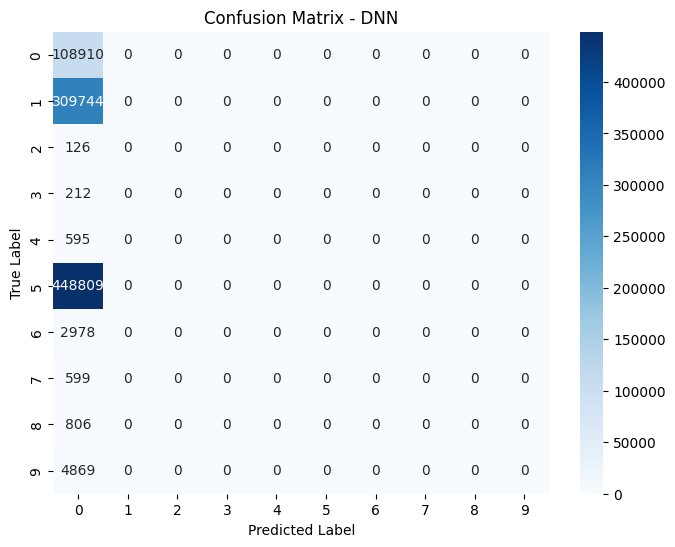

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_classes = np.argmax(y_pred, axis=1)

from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - DNN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Accuracy Comparison

In [ ]:
import matplotlib.pyplot as plt

model_names = ['CatBoost','XGBoost', 'Random Forest', 'Artificial Neural Network', 'Decision Tree',  'Logistic Regression' ]
accuracy_scores = [98.85, 99.11, 98.96, 98.85,  98.41, 98.16, 91.33, 86.78 ]

colors = ['#854442','#005b96', '#88ca5e', '#eb8926', '#d21f3c', '#a8acdb', '#d6d727', '#74afda']

plt.figure(figsize=(10, 7))
bars = plt.bar(model_names, accuracy_scores, color=colors)

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')

for bar, score in zip(bars, accuracy_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{score:.2f}%', ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Top 50 features have importance, other features have 0 importance

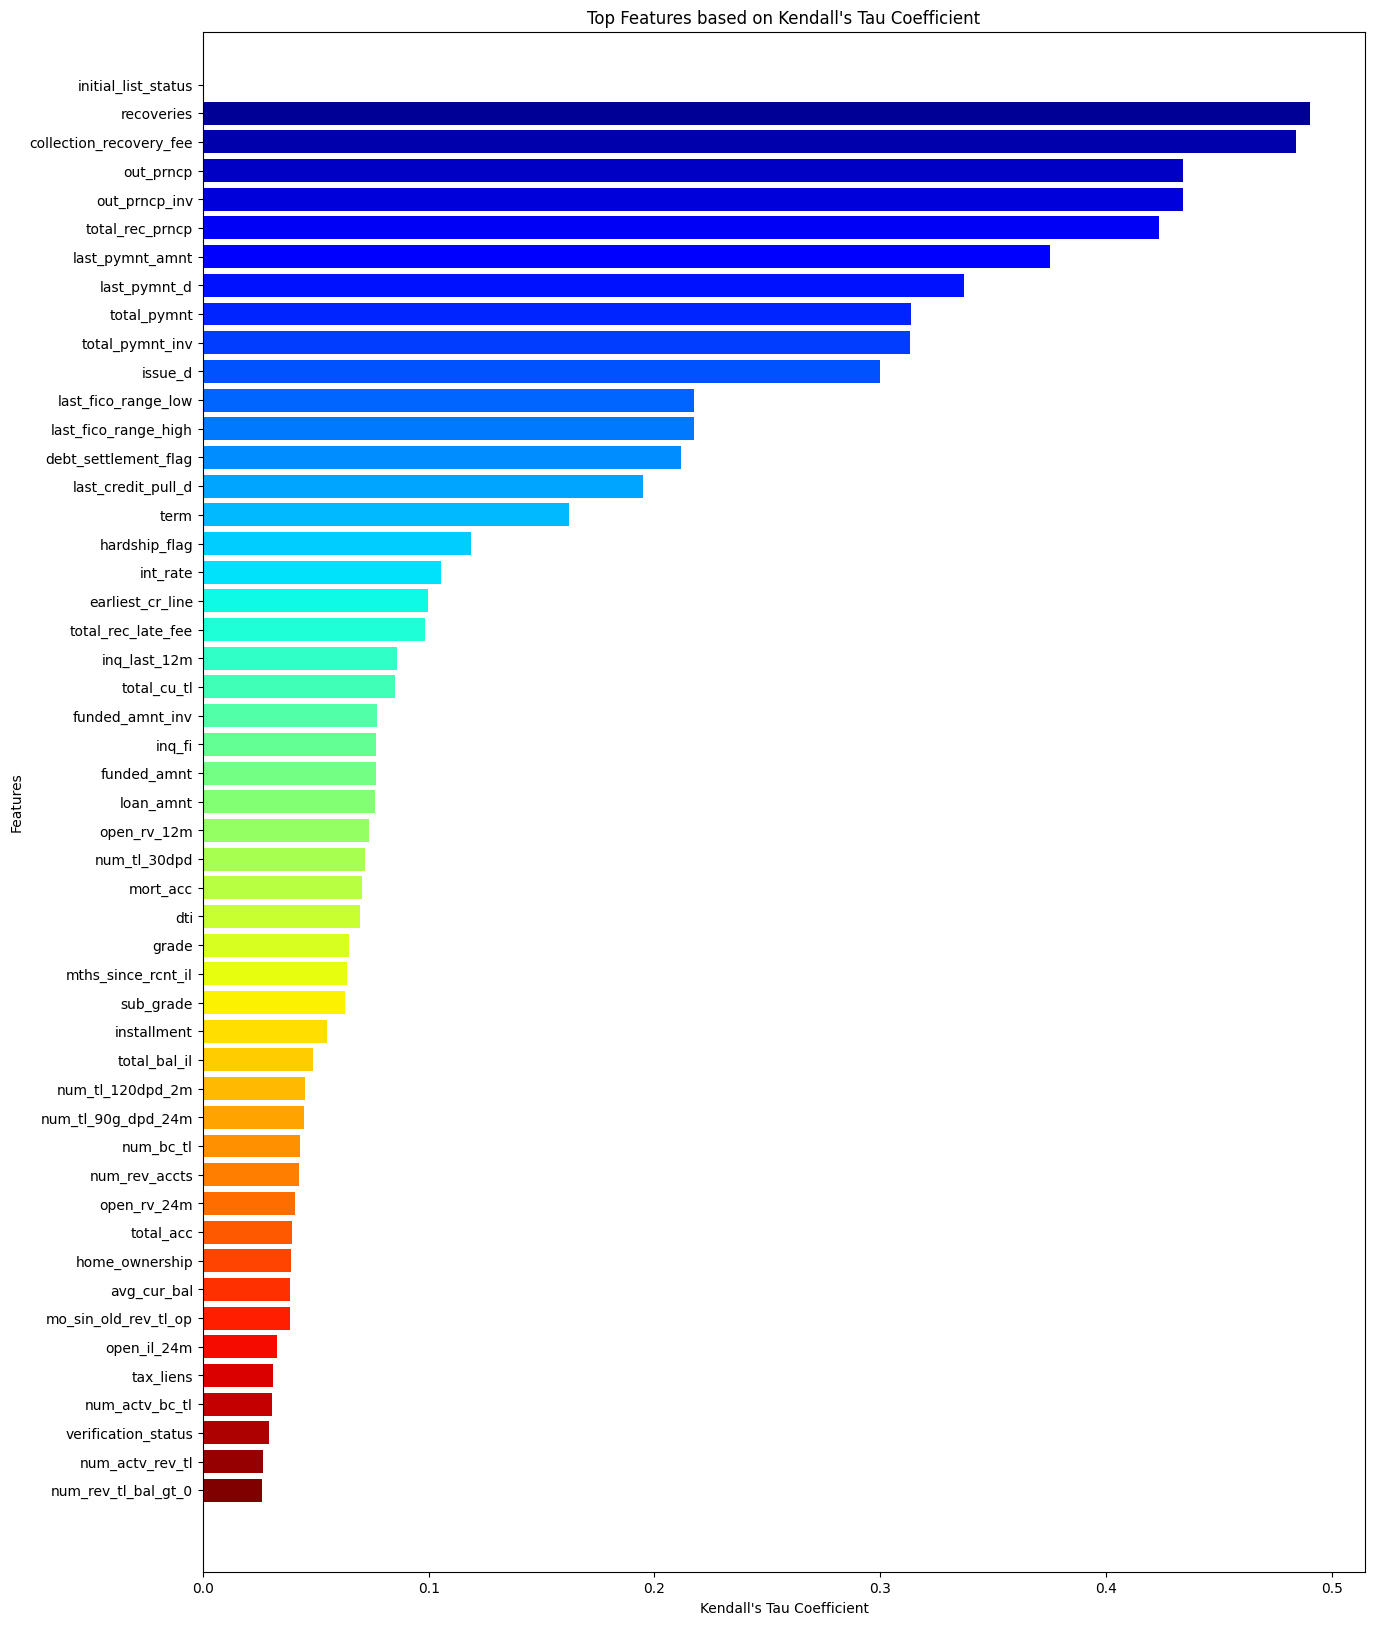

In [ ]:
import matplotlib.pyplot as plt

# Extract feature names and tau scores
features = [feature for feature, _ in ranked_features[:k]]
tau_scores = [tau_score for _, tau_score in ranked_features[:k]]
colors = plt.cm.jet(np.linspace(0, 1, len(tau_scores)))

# Plotting
plt.figure(figsize=(15, 20))
plt.barh(features, tau_scores, color=colors)
plt.xlabel("Kendall's Tau Coefficient")
plt.ylabel("Features")
plt.title("Top Features based on Kendall's Tau Coefficient")
plt.gca().invert_yaxis()  # Invert y-axis to display the most important features on top
plt.show()

# **LASSO Regularization L1**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.846e+06, tolerance: 1.132e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.848e+06, tolerance: 1.132e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.837e+06, tolerance: 1.132e

Best Params {'alpha': 1e-05}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.303e+06, tolerance: 1.415e+03
  model = cd_fast.enet_coordinate_descent(


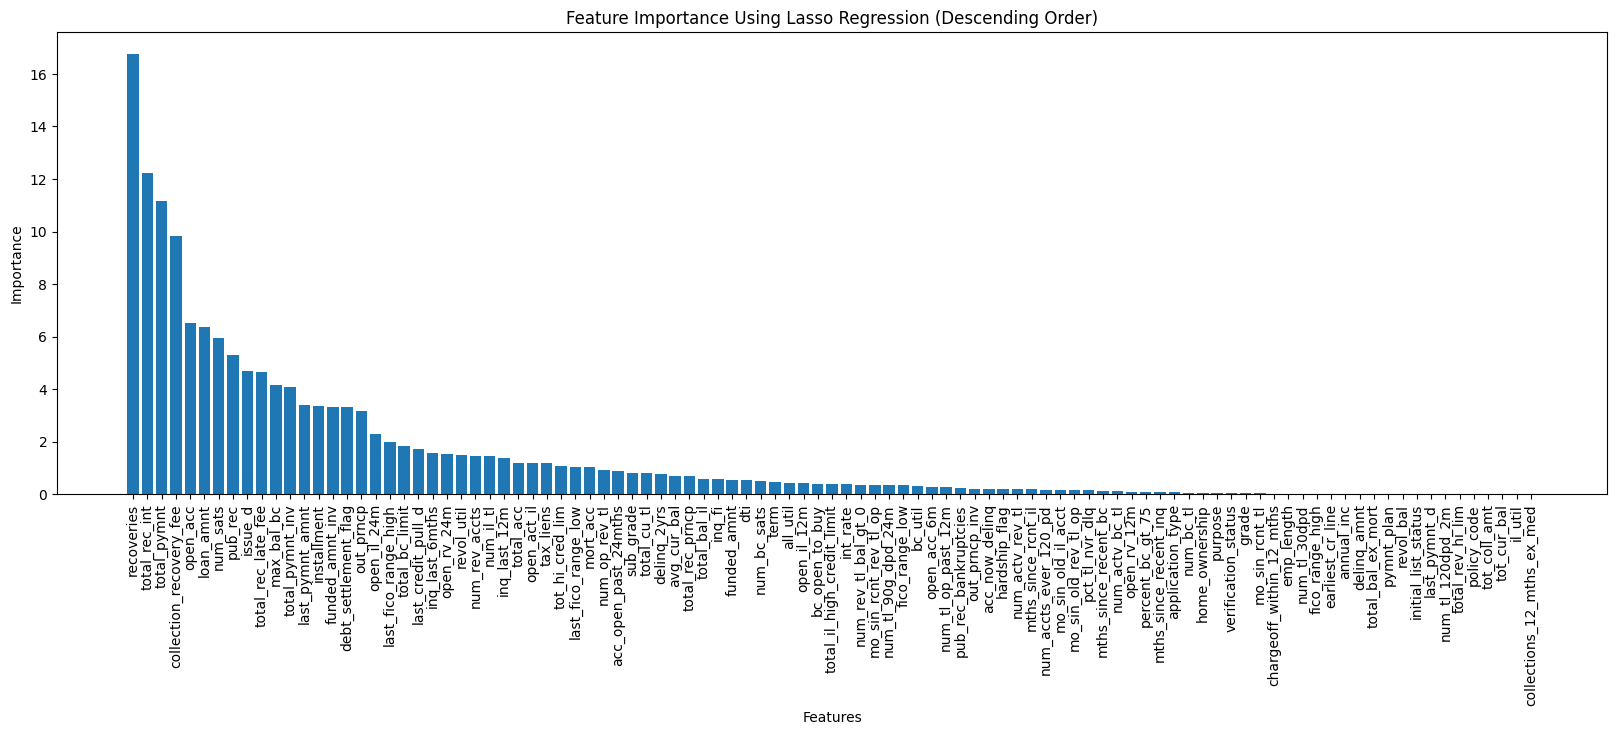

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, KFold

# Define parameters to be tested on GridSearchCV
params = {"alpha": np.arange(0.00001, 10, 500)}
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initializing the Lasso model
lasso = Lasso()
# GridSearchCV with model, params, and folds
lasso_cv = GridSearchCV(lasso, param_grid=params, cv=kf)
lasso_cv.fit(X, y)
print("Best Params {}".format(lasso_cv.best_params_))

# Using best alpha parameter
best_alpha = lasso_cv.best_params_['alpha']

lasso_model = Lasso(alpha=best_alpha)
lasso_model.fit(X, y)
lasso_coef = np.abs(lasso_model.coef_)

sorted_indices = np.argsort(lasso_coef)[::-1]

# Sort features and coefficients based on sorted indices
sorted_features = X.columns[sorted_indices]
sorted_coef = lasso_coef[sorted_indices]

# Plotting feature importance
plt.figure(figsize=(20, 6))
plt.bar(range(len(sorted_coef)), sorted_coef)
plt.xticks(range(len(sorted_coef)), sorted_features, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance Using Lasso Regression (Descending Order)')
plt.show()

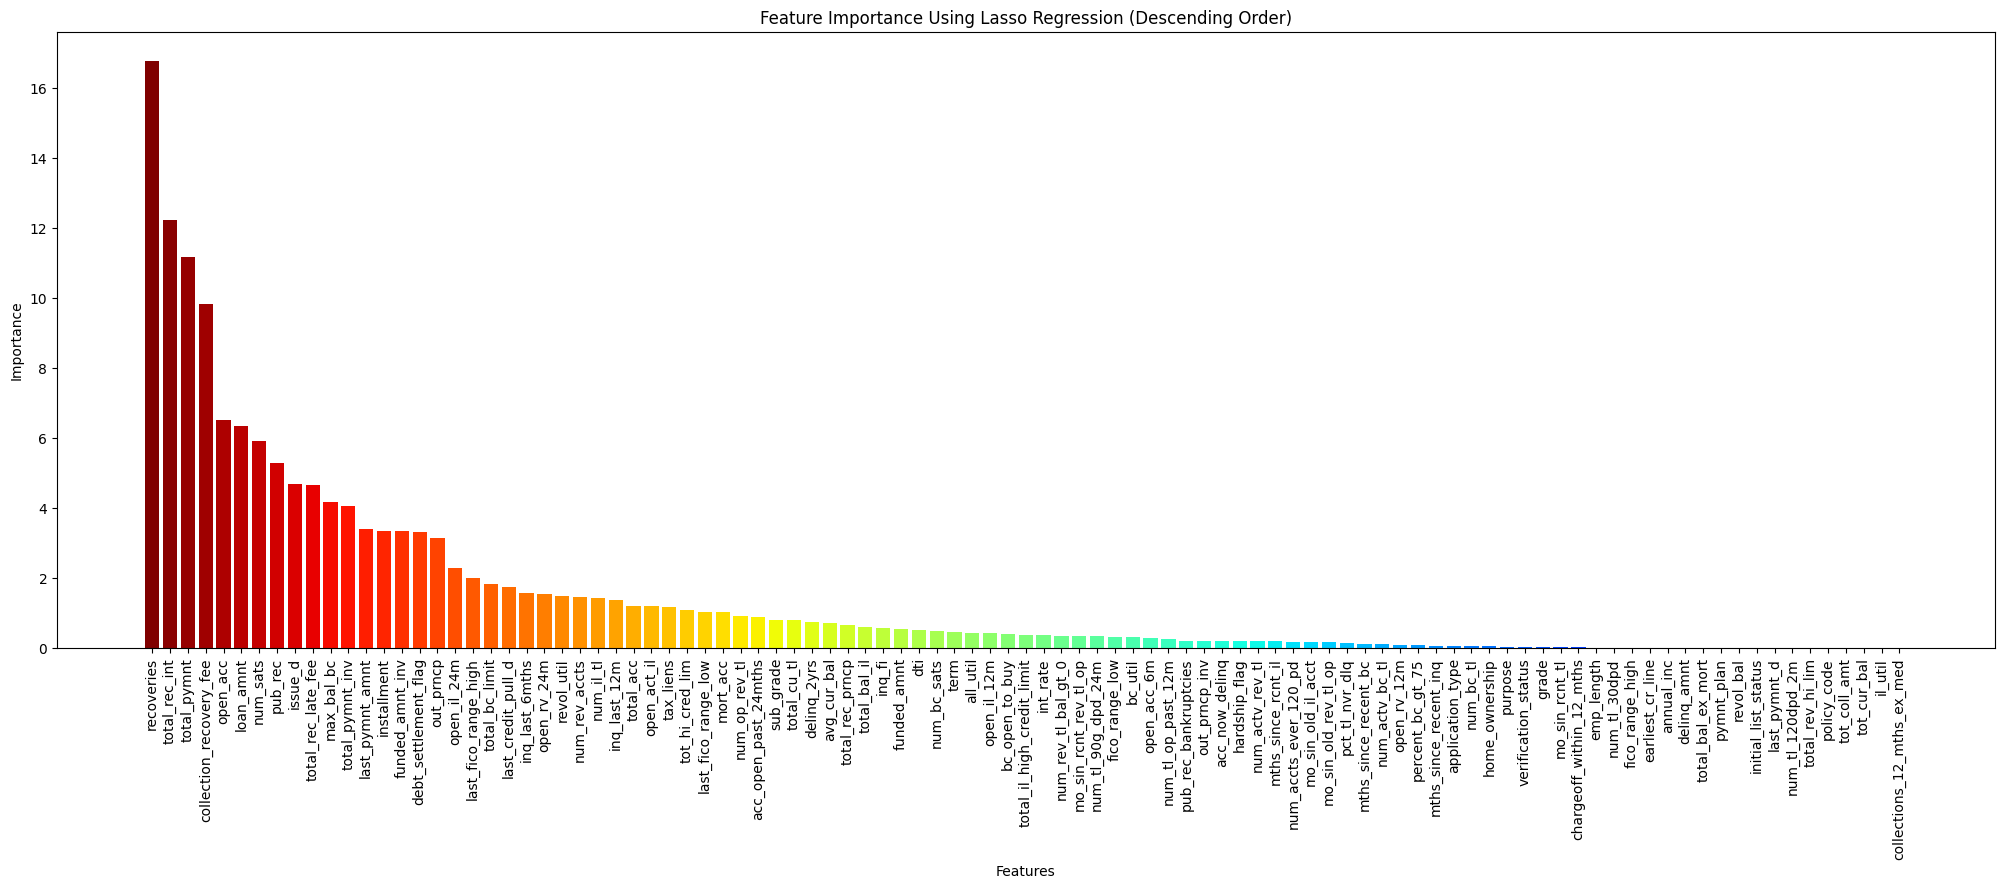

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting feature importance
plt.figure(figsize=(25, 8))
bars = plt.bar(range(len(sorted_coef)), sorted_coef, color=plt.cm.jet(np.linspace(1, 0, len(sorted_coef))))
plt.xticks(range(len(sorted_coef)), sorted_features, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance Using Lasso Regression (Descending Order)')


plt.show()


# **Chi- Square Test**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split

X = pd.DataFrame(X)
y = pd.Series(y)

chi2_scores, p_values = chi2(X, y)
significant_features_indices = chi2_scores > np.percentile(chi2_scores, 5)
significant_features = X.columns[significant_features_indices]

X_train, X_test, y_train, y_test = train_test_split(X[significant_features], y, test_size=0.2, random_state=5)

threshold_percentile = 5
threshold_value = np.percentile(chi2_scores, threshold_percentile)
significant_features_indices = chi2_scores > threshold_value
significant_features = X.columns[significant_features_indices]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X[significant_features], y, test_size=0.2, random_state=5)



In [ ]:
X_train.shape

(2340394, 0)

In [ ]:
y.shape

(2925493,)